## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kneed
from kneed import KneeLocator

from sklearn.cluster import KMeans

import seaborn as sns
import warnings as war

war.filterwarnings('ignore')


In [54]:
df = pd.read_csv('datasets/WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [55]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [56]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [57]:
df.shape

(178, 13)

In [58]:
column_of_num = df.select_dtypes(include=['int64', 'float64']).columns
column_of_num

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [59]:
len(column_of_num)

13

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [60]:
km = KMeans()
km

KMeans()

In [61]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
km.fit(df)

KMeans()

In [63]:
km.predict(df)

array([4, 4, 0, 5, 7, 5, 0, 0, 4, 4, 5, 0, 0, 4, 5, 0, 0, 4, 5, 3, 7, 7,
       4, 4, 3, 3, 0, 0, 3, 4, 0, 5, 4, 0, 4, 3, 3, 4, 4, 7, 3, 4, 4, 7,
       3, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 6, 7, 6, 1, 2, 2, 7,
       6, 6, 7, 7, 3, 2, 6, 4, 3, 2, 2, 6, 7, 6, 2, 7, 1, 6, 6, 6, 6, 1,
       7, 1, 6, 6, 6, 2, 2, 3, 1, 2, 7, 2, 7, 1, 6, 2, 7, 2, 6, 6, 2, 7,
       1, 2, 1, 6, 2, 2, 6, 2, 2, 1, 1, 6, 2, 2, 2, 2, 2, 6, 2, 1, 1, 6,
       1, 1, 1, 7, 7, 6, 1, 1, 1, 7, 6, 1, 3, 3, 2, 1, 1, 1, 6, 6, 2, 7,
       1, 7, 6, 3, 7, 1, 6, 7, 1, 7, 1, 6, 7, 7, 7, 1, 6, 6, 7, 7, 7, 3,
       3, 1])

In [64]:
km.predict(df).max()

7

In [65]:
km.cluster_centers_

array([[1.37623529e+01, 1.78058824e+00, 2.54058824e+00, 1.73588235e+01,
        1.05411765e+02, 2.83294118e+00, 2.97588235e+00, 3.08235294e-01,
        1.82352941e+00, 5.91647059e+00, 1.09529412e+00, 3.03823529e+00,
        1.27088235e+03],
       [1.27089286e+01, 2.77107143e+00, 2.39821429e+00, 2.13607143e+01,
        9.64285714e+01, 1.89964286e+00, 1.20321429e+00, 4.08214286e-01,
        1.29107143e+00, 5.23821429e+00, 8.37500000e-01, 2.14928571e+00,
        5.99714286e+02],
       [1.23869231e+01, 2.30461538e+00, 2.22307692e+00, 2.03653846e+01,
        9.01153846e+01, 2.35961538e+00, 2.18615385e+00, 3.48076923e-01,
        1.62500000e+00, 3.08846154e+00, 1.03000000e+00, 2.76653846e+00,
        3.71730769e+02],
       [1.30281250e+01, 2.33500000e+00, 2.44875000e+00, 1.97312500e+01,
        1.12125000e+02, 2.32875000e+00, 1.99687500e+00, 3.52500000e-01,
        1.71062500e+00, 5.35250000e+00, 9.11625000e-01, 2.68312500e+00,
        8.65500000e+02],
       [1.37512500e+01, 1.96916667e+

In [66]:
wcss = []
for i in range(1, 15):
    km_each = KMeans(n_clusters=i)
    km_each.fit_predict(df.values)
    wcss.append(km_each.inertia_)

wcss


[17592296.383508474,
 4543749.614531861,
 2370689.686782969,
 1342208.5439413232,
 916379.1871539169,
 702809.2692509473,
 414752.87383925024,
 324361.8588670191,
 297704.2121466383,
 226186.10768302582,
 189601.21861777303,
 192927.9650408873,
 148283.98597015342,
 129018.34231741191]

In [67]:
len(wcss)

14

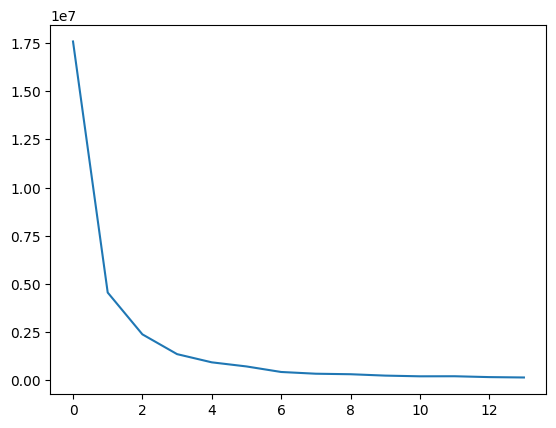

In [68]:
plt.plot(range(0, 14), wcss)

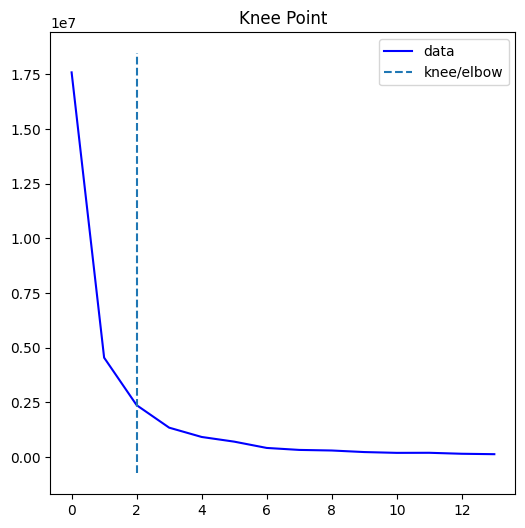

In [69]:
knee = KneeLocator(range(0, 14), wcss, curve='convex', direction='decreasing')
knee.plot_knee()

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [81]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [83]:
df.shape

(178, 14)

In [86]:
df_n = df.iloc[ : , 0:13 ]
df_n.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [87]:
km_new = KMeans(n_clusters=2)
predicted = km_new.fit_predict(df_n)
predicted

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [71]:
len(predicted)

178

In [76]:
df['Clusters'] = predicted
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [90]:
df_clus_0 = df[df['Clusters'] == 0]
df_clus_1 = df[df['Clusters'] == 1]

In [93]:
df_clus_0.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,0
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,0
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,0


In [94]:
df_clus_1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [113]:
mean_clus_0 = df_clus_0.mean()
mean_clus_1 = df_clus_1.mean()

In [ ]:
df_clus_compare = pd.DataFrame({
    'cluster_0': mean_clus_0,
    'cluster_1': mean_clus_1,
    'diff' : abs(mean_clus_0 - mean_clus_1)
})
df_clus_compare

,cluster_0,cluster_1,diff
Alcohol,12.702846,13.666545,-0.963700
Malic_Acid,2.544553,1.870727,0.673826
Ash,2.339106,2.427818,-0.088712
Ash_Alcanity,20.408130,17.452727,2.955403
Magnesium,96.813008,106.290909,-9.477901
Total_Phenols,2.062114,2.816182,-0.754068
Flavanoids,1.641463,2.896545,-1.255082
Nonflavanoid_Phenols,0.392683,0.292909,0.099774
Proanthocyanins,1.454065,1.896909,-0.442844
Color_Intensity,4.851382,5.520364,-0.668982


In [ ]:
plt.scatter(df_clus_0['Alcohol'], df_clus_0[''])

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


# Best of Luck